# Function imports

In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

# Plot formatting

In [22]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 16}

mpl.rc('font', **font)

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Histology visualization

In [ ]:
df = pd.read_excel('/Data/histology/quantification_NMDA.xlsx')
df['cells_per_mm2'] = df.number_AOB_neurons / (df['area [um2]'] / 10**6)

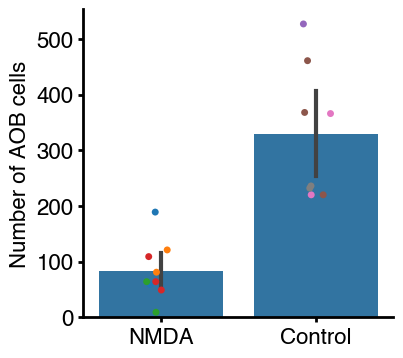

In [24]:
plt.figure(figsize=[4,4])

sns.barplot(df, x='group', y='number_AOB_neurons')
sns.stripplot(df, x='group', y='number_AOB_neurons', hue='animal_ID')

plt.ylabel('Number of AOB cells')
plt.xlabel('')
plt.xticks([0,1], ['NMDA', 'Control'])

plt.legend('', frameon=False)

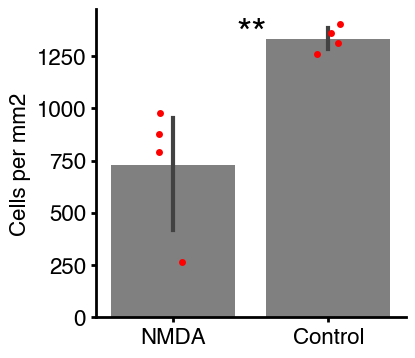

In [33]:
plt.figure(figsize=[4,4])

animal_means = df[['animal_ID', 'group', 'cells_per_mm2']].groupby('animal_ID').agg({'group': 'first', 
                                                                      'cells_per_mm2': 'mean'})

sns.barplot(animal_means, x='group', y='cells_per_mm2', color='grey')
sns.stripplot(animal_means, x='group', y='cells_per_mm2', color='red')
plt.ylabel('Cells per mm2')
plt.xlabel('')
plt.xticks([0,1], ['NMDA', 'Control'])

plt.text(0.41, 1300, '**', fontsize=28)

plt.savefig('../Plots/Histology/Quantification.png', dpi=300, bbox_inches='tight')

In [26]:
import statsmodels.formula.api as smf

model = smf.mixedlm('cells_per_mm2 ~ group', df, groups='animal_ID').fit()

model.summary()

/Users/borakn/opt/anaconda3/envs/HierarchySensoryModality/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/borakn/opt/anaconda3/envs/HierarchySensoryModality/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/borakn/opt/anaconda3/envs/HierarchySensoryModality/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/borakn/opt/anaconda3/envs/HierarchySensoryModality/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/borakn/opt/anaconda3/envs/

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:             MixedLM  Dependent Variable:  cells_per_mm2
No. Observations:  17       Method:              REML         
No. Groups:        8        Scale:               136988.7383  
Min. group size:   1        Log-Likelihood:      -112.1418    
Max. group size:   3        Converged:           No           
Mean group size:   2.1                                        
--------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025   0.975] 
--------------------------------------------------------------
Intercept     1326.618  131.913 10.057 0.000 1068.073 1585.163
group[T.nmda] -593.302  181.999 -3.260 0.001 -950.014 -236.591
animal_ID Var  264.680  218.348                               
==============================================================

"""